In [654]:
import random
import matplotlib.pyplot as plt
import numpy as np


# <center> TP noté : affectations ParcourSup </center>
<center> 2024/2025 - T. Godin, L. Naert </center>
<center> IUT de Vannes, BUT Informatique </center>

# Contexte et problématique
Après avoir vu votre projet sur Gale-Shapley et Selkow, les responsables de ParcourSup vous contacte afin de mettre en place le nouvel algorithme d'affectation des élèves dans le supérieur.

Pour la rentrée prochaine, ils ont opté pour une approche totalement différente : au lieu d'un algorithme de mariage classique, ils decident de __proposer aléatoirement une nouvelle formation par jour__ à l'élève, jusqu'à ce qu'il accepte.

Pour aider les élèves dans ce choix, ils souhaitent proposer un outil implémentant une stratégie pour l'élève sachant que : 

- La période d'affectation dure $n$ jours (ce nombre $n$ est connu par les élèves)
- Chaque jour, on propose une formation sous la forme d'un score (positif) : plus ce score est grand, plus l'élève souhaite être admis dans la formation (ce score a été déterminé grace aux voeux de l'élève)
- Un élève ne peut pas accepter une proposition passée et il ne connait pas les propositions futures.
- Toute acceptation est définitive : un élève ne peut pas changer d'avis, il sera affecté dans la formation qu'il a accepté.
    
Les responsables de Parcoursup attendent de votre part une fonction `choice(n, seen)` dont les paramètres sont : 
- `n` la durée totale de la période d'affectation
- `seen` l'historique des propositions d'affectation sous forme d'une liste de scores. __Le dernier élément de `seen`__ (donc `seen[-1]` ou  `seen[len(seen)-1]`) __est la proposition du jour pour l'élève.__

La fonction renvoie `True` si l'élève accepte la proposition du jour et `False` s'il choisit d'attendre.

# Contraintes 

- Durée du projet : 2h30 (3h20 si étudiants en possession d'un tiers-temps)
- Nombre de personnes dans le groupe : 2
- L'usage d'IA génératives (chatGPT et copilot notamment) est interdit. 
- La communication avec les autres binômes que ça soit à l'oral ou par messagerie est interdite
- L'usage d'internet (autre qu'IA générative) est autorisé 
- Tout document de cours (CM, TP) est autorisé 

# Cahier des charges du rendu

Les responsables de ParcourSup souhaiteraient recevoir un travail de synthèse sous la forme de ce __jupyter notebook complété__. 

Les responsables de ParcourSup devront justifier leur choix, ils attendent donc que vous justifiez et argumentiez votre démarche.

Vous pouvez proposer une ou plusieurs versions de la fonction `choice`. Ces propositions devront faire l'objet d'une __analyse des résultats__ (texte, courbes, métriques...). Si plusieurs versions de `choice` sont proposées, une comparaison des performances devra être réalisée pour indiquer quelle version doit être choisie en définitive. 

# Notation

La pertinence des propositions, l'exhaustivité des analyses et la clarté des explications seront pris en compte dans la notation.

# Exemple

Pour vous guider dans votre travail de recherche, ParcourSup vous a fournit :
- un exemple de fonction `choice(n, seen)` appelée `dummy_choice` qui choisit systématiquement la troisième formation proposée
- une fonction `rand_list(n)` qui fournit une liste de `n` formations sous forme de scores tirés au hasard entre 100 et 1000. Attention, ces bornes de scores sont celles de l'année passée pour l'étudiant en question, rien ne dit que ce seront les mêmes cette année.



----

# On définit des fonctions pour généner nos listes de scores


In [655]:
# Crée une liste aléatoire
def rand_list(n):
    rlist = []
    for _ in range(n):
        num = random.randint(100, 1000)
        rlist.append(num)
    return rlist



In [674]:
# Crée une liste triée dans l'ordre croissant
def list_to_max(n):
    rlist = rand_list(n)
    rlist.sort()
    return rlist

# Crée une liste triée dans l'ordre décroissant
def list_to_min(n):
    rlist = rand_list(n)
    rlist.sort(reverse=True)
    return rlist


# Function de choice

On définit une première fonction dummy_choice qui choisit systématiquement la troisième formation proposée

In [656]:
def dummy_choice(n, seen):
    choice = False
    i = len(seen)
    if i == 3:
        choice = True
    return choice


On définit une fonction aléatoire choice_random qui choisit aléatoirement une proposition.

In [657]:
def random_choice(n, seen):
    random_choice = random.randint(0, 1) * n
    choice = False
    i = len(seen)
    if i == random_choice:
        choice = True
    return choice


In [671]:
def choice(n, seen):
    """
    n : durée totale de la période d'admission
    seen : tableau avec les choix précédents (len(seen) - n = jours restants). seen[-1] => choix du jour, le reste => les choix précédents. sous forme de nombre entre 0 et 1000 (+ c'est haut, plus l'élève veux ce choix)
    """
    alpha = len(seen) / n

    jours_restants = n - len(seen)
    if jours_restants > 1:
        choice = False

        if len(seen) > 1:
            # si le score du jour est supérieur à la moyenne des scores précédents, alors le choix est accepté
            if seen[-1] > np.mean(seen[:-1]):
                # si l'alpha est faible (début de la liste), on a peu de chances de choisir
                if random.random() < alpha:
                    choice = True
        else:
            # si c'est le 1er, il a une petite chance proportionnelle à n
            if random.random() < alpha:
                choice = True

        return choice
    else:
        # si c'est le dernier jour, alors le choix est automatiquement accepté
        return True



### Fonction `choice`

- **Paramètres :**
    - `n` : durée totale de la période d'admission
    - `seen` : tableau avec les choix précédents (len(seen) - n = jours restants). `seen[-1]` représente le choix du jour, le reste représente les choix précédents, sous forme de nombre entre 0 et 1000 (plus le nombre est élevé, plus l'élève souhaite ce choix).

- **Logique de la fonction :**
    - Si le score du jour est supérieur à la moyenne des scores précédents, alors le choix est accepté.
    - Si l'alpha est faible (début de la liste), il y a peu de chances de choisir.
    - Si c'est le premier jour, il y a une petite chance proportionnelle à `n`.
    - Si c'est le dernier jour, alors le choix est automatiquement accepté.


In [659]:
def resultat(listeScores, fonctionChoix):
    i = 0
    choice = False

    while i < len(listeScores) and not (choice):
        i = i + 1
        choice = fonctionChoix(n, listeScores[:i])

    chosen = listeScores[i - 1]

    return chosen, i


n = 10
liste = rand_list(n)

print("Random :")
chosen, i = resultat(liste, random_choice)
print(f"Vous avez choisi la formation proposée le jour n°{i}. Cette formation a un score de {chosen}")

print("\nAlgo :")
chosen, i = resultat(liste, choice)
print(f"Vous avez choisi la formation proposée le jour n°{i}. Cette formation a un score de {chosen}")


Random :
Vous avez choisi la formation proposée le jour n°10. Cette formation a un score de 647

Algo :
Vous avez choisi la formation proposée le jour n°9. Cette formation a un score de 341


### Visualisation : Comparaison entre l'aléatoire et notre algo
On peut voir que notre algorithme est en moyenne 1.5 fois plus performant que l'aléatoire.  
On peut aussi voir que la différence entre la valeur choisie par notre algorithme et la valeur réellement maximale de la liste est deux fois plus petite que pour l'algorithme aléatoire.


Score moyen pour random_choice : 541.747
Score moyen pour choice : 706.425


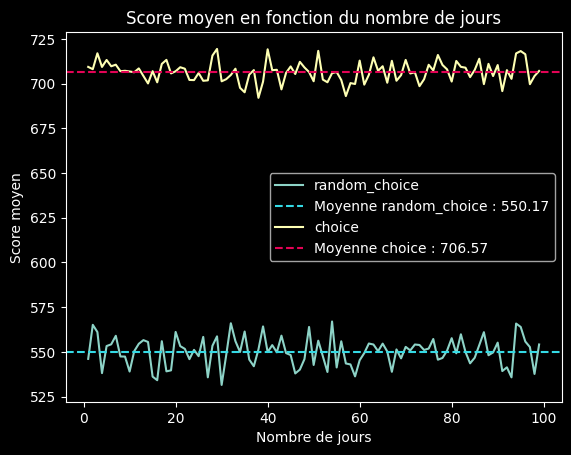

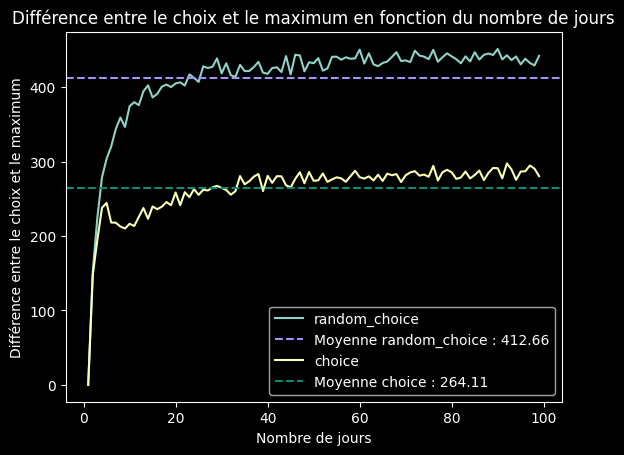

In [672]:
def score_moyen(fonctionChoix, nbTests=1000):
    n = 100
    score = 0
    
    for _ in range(nbTests):
        listesScores = rand_list(n)
        chosen, _ = resultat(listesScores, fonctionChoix)

        score += chosen
    
    return score / nbTests

print(f"Score moyen pour random_choice : {score_moyen(random_choice)}")
print(f"Score moyen pour choice : {score_moyen(choice)}")

# affiche dans une courbe le score moyen en fonction du nombre de jours
def plot_score_moyen(fonctionsChoix, nbTests=1000):
    for fonctionChoix in fonctionsChoix:
        x = []
        y = []
        for n in range(1, 100):
            x.append(n)
            y.append(score_moyen(fonctionChoix, nbTests))
        
        plt.plot(x, y, label=fonctionChoix.__name__)
        moyenne_y = sum(y) / len(y)
        plt.axhline(y=moyenne_y, color=np.random.rand(3,), linestyle="--", label=f"Moyenne {fonctionChoix.__name__} : {moyenne_y:.2f}")

    plt.xlabel("Nombre de jours")
    plt.ylabel("Score moyen")
    plt.title("Score moyen en fonction du nombre de jours")
    plt.legend()
    plt.show()

# affiche la différence entre le choix trouvé et le vrai maximum de la liste
def plot_diff_max(fonctionsChoix, nbTests=1000):
    for fonctionChoix in fonctionsChoix:
        x = []
        y = []
        for n in range(1, 100):
            score = 0
            for _ in range(nbTests):
                listesScores = rand_list(n)
                chosen, _ = resultat(listesScores, fonctionChoix)
                score += max(listesScores) - chosen
            
            x.append(n)
            y.append(score / nbTests)
        
        plt.plot(x, y, label=fonctionChoix.__name__)
        moyenne_y = sum(y) / len(y)
        plt.axhline(y=moyenne_y, color=np.random.rand(3,), linestyle="--", label=f"Moyenne {fonctionChoix.__name__} : {moyenne_y:.2f}")
    
    plt.xlabel("Nombre de jours")
    plt.ylabel("Différence entre le choix et le maximum")
    plt.title("Différence entre le choix et le maximum en fonction du nombre de jours")
    plt.legend()
    plt.show()

plot_score_moyen([random_choice, choice])

plot_diff_max([random_choice, choice])


### Visualisation : Complexité de l'algorithme en fonction du nombre de jours

On peut s'aperçevoir que la complexité de `random_choice()` est linéaire (environ $n/2$ itérations pour $n$ jours).  
Notre algo est étonamment en complexité $O(5)$. Sans que nous sachions pourquoi, la complexité est constante peu importe la taille de $n$.


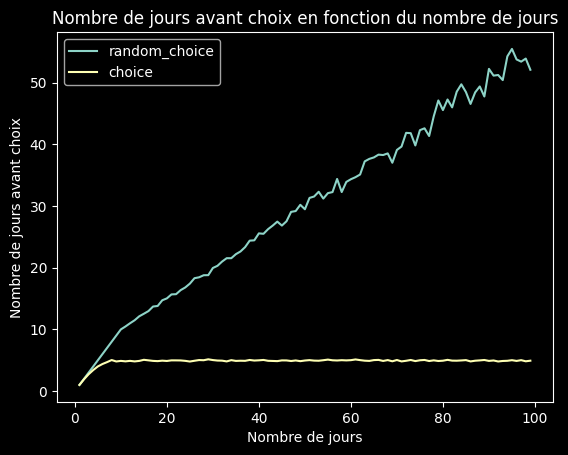

In [673]:
# graphe de complexité en fonction de n
def plot_complexite(fonctionsChoix):
    for fonctionChoix in fonctionsChoix:
        x = []
        y = []
        for n in range(1, 100):
            x.append(n)
            y.append(0)
            for _ in range(1000):
                listesScores = rand_list(n)
                _, i = resultat(listesScores, fonctionChoix)
                y[-1] += i
            
            y[-1] /= 1000
        
        plt.plot(x, y, label=fonctionChoix.__name__)
    plt.xlabel("Nombre de jours")
    plt.ylabel("Nombre de jours avant choix")
    plt.title("Nombre de jours avant choix en fonction du nombre de jours")
    plt.legend()
    plt.show()

plot_complexite([random_choice, choice])


Enfin, on peut voir que même avec des listes triées (dans l'ordre croissant puis décroissant), les performances sont similaires


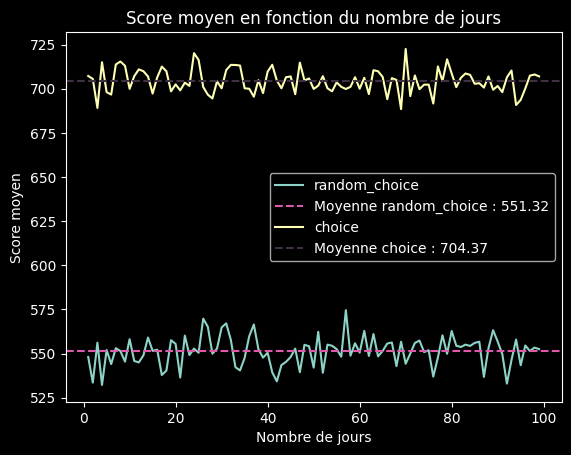

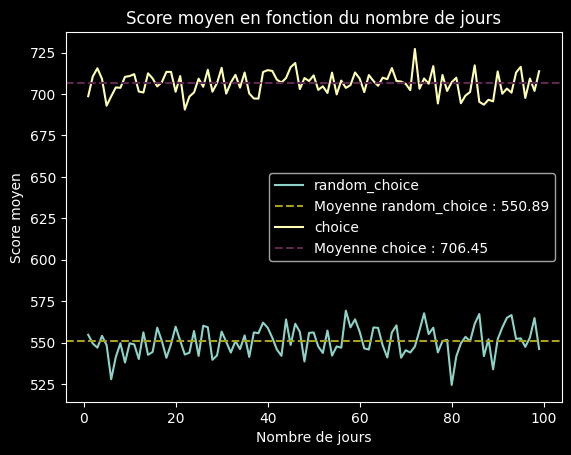

In [675]:
liste = list_to_max(n)
plot_score_moyen([random_choice, choice])

liste = list_to_min(n)
plot_score_moyen([random_choice, choice])
